Wavelet Transform

In [2]:
import pandas as pd
import numpy as np
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt
from PIL import Image
import os
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pywt

In [12]:
pip install PyWavelets


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 12.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
real_folder = '/Users/varunchowdary/Desktop/DSLFinalProject/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/ai vs real art/REAL'
fake_folder = '/Users/varunchowdary/Desktop/DSLFinalProject/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/ai vs real art/FAKE'

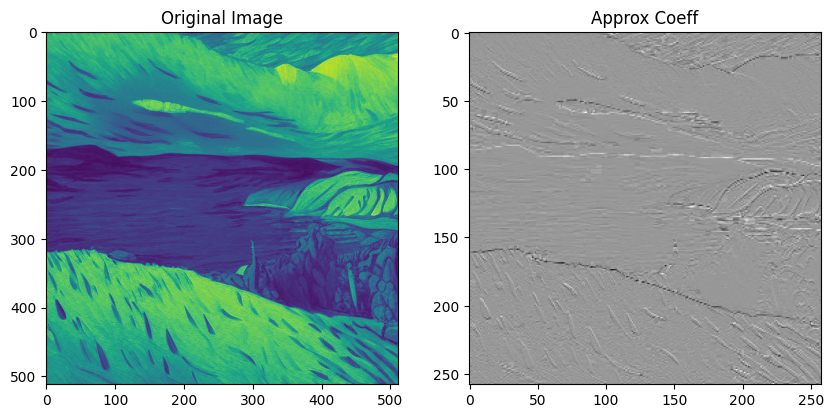

In [8]:
real_fft = []
fake_fft = []

output_real_folder = '/Users/varunchowdary/Documents/GitHub/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/frequency_analysis/varun_real_wavelets'
output_fake_folder = '/Users/varunchowdary/Documents/GitHub/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/frequency_analysis/varun_fake_wavelets'
os.makedirs(output_real_folder, exist_ok=True)
os.makedirs(output_fake_folder, exist_ok=True)

for filename in os.listdir(real_folder):
    image = Image.open(real_folder + '/' + filename).convert('L')
    image_np = np.array(image)
    coeffs = pywt.dwt2(image_np, 'bior1.3')
    cA, (cH, cV, cD) = coeffs
    output_path = os.path.join(output_real_folder, filename.split('.')[0] + '_1.npy')
    np.save(output_path, cA)

for filename in os.listdir(fake_folder):
    image = Image.open(fake_folder + '/' + filename).convert('L')
    image_np = np.array(image)
    coeffs = pywt.dwt2(image_np, 'bior1.3')
    cA, (cH, cV, cD) = coeffs
    #Can change the indices to decide which of the coeffcients of wavelet you want. Look online and figure out which is the best. 
    output_path = os.path.join(output_fake_folder, filename.split('.')[0] + '_0.npy')
    np.save(output_path, cA)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image_np), plt.title('Original Image')
plt.subplot(122), plt.imshow(cH, cmap='gray'), plt.title('Approx Coeff')

plt.show()

In [13]:
from skimage import feature
import cv2


In [18]:
real_fft = []
fake_fft = []
p,r = 8,1

output_real_folder = '/Users/varunchowdary/Documents/GitHub/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/frequency_analysis/varun_real_lbp'
output_fake_folder = '/Users/varunchowdary/Documents/GitHub/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/frequency_analysis/varun_fake_lbp'
os.makedirs(output_real_folder, exist_ok=True)
os.makedirs(output_fake_folder, exist_ok=True)

for filename in os.listdir(real_folder):
    image = Image.open(real_folder + '/' + filename).convert('L')
    image_np = np.array(image)
    #gray_cov = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
    ldp = feature.local_binary_pattern(image_np, p,
            r, method="uniform")
    print(ldp)
    
    #coeffs = pywt.dwt2(image_np, 'bior1.3')
    #cA, (cH, cV, cD) = coeffs
    #output_path = os.path.join(output_real_folder, filename.split('.')[0] + '_1.npy')
    #np.save(output_path, cA)


[[3. 5. 4. ... 9. 0. 3.]
 [3. 5. 4. ... 5. 8. 0.]
 [3. 4. 4. ... 4. 4. 9.]
 ...
 [2. 9. 7. ... 3. 5. 5.]
 [2. 5. 5. ... 1. 2. 4.]
 [0. 9. 9. ... 3. 4. 3.]]
[[3. 0. 9. ... 1. 0. 3.]
 [1. 4. 8. ... 4. 6. 9.]
 [1. 4. 7. ... 5. 2. 9.]
 ...
 [5. 8. 4. ... 6. 1. 0.]
 [2. 1. 1. ... 5. 3. 2.]
 [3. 4. 3. ... 9. 9. 3.]]
[[0. 9. 4. ... 1. 5. 2.]
 [3. 1. 0. ... 7. 9. 0.]
 [9. 8. 7. ... 2. 9. 4.]
 ...
 [9. 0. 6. ... 9. 7. 9.]
 [0. 8. 7. ... 7. 2. 9.]
 [3. 9. 0. ... 9. 3. 0.]]
[[2. 3. 1. ... 3. 3. 3.]
 [4. 4. 0. ... 1. 4. 4.]
 [5. 3. 1. ... 1. 4. 3.]
 ...
 [3. 6. 5. ... 4. 6. 3.]
 [5. 4. 3. ... 8. 8. 2.]
 [3. 2. 1. ... 9. 9. 0.]]
[[1. 5. 4. ... 4. 4. 3.]
 [5. 1. 0. ... 9. 0. 2.]
 [1. 9. 8. ... 0. 9. 3.]
 ...
 [9. 4. 3. ... 0. 1. 3.]
 [1. 4. 7. ... 4. 8. 9.]
 [0. 3. 5. ... 4. 1. 0.]]
[[1. 3. 5. ... 1. 2. 3.]
 [9. 4. 7. ... 3. 5. 5.]
 [1. 5. 8. ... 6. 5. 5.]
 ...
 [9. 5. 4. ... 4. 3. 4.]
 [1. 1. 1. ... 2. 6. 5.]
 [3. 4. 4. ... 0. 2. 2.]]
[[2. 3. 5. ... 0. 9. 0.]
 [1. 1. 4. ... 1. 8. 1.]
 [3. 2. 3. ...